In [1]:
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
import trackpy
from iris.time import PartialDateTime
import functions
import netCDF4 as nc

import tobac #tobac package cloned from https://github.com/tobac-project/tobac.git

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [3]:
# tobac output with strict thresholding (using threshold=[240, 170], n_min_threshold=[1975, 1])
features = pd.read_hdf('Save/cold_core/Features_240_170_low.h5', 'table')
mask = nc.Dataset('Save/cold_core/Mask_Segmentation_tb_240_170_low.nc')
tracks = pd.read_hdf('Save/cold_core/Track_240_170_low.h5', 'table')

#tobac output with no strict thresholding (using same thresholds as above)
features_no = pd.read_hdf('Save/cold_core/Features_240_170_low_nostrict.h5', 'table')
mask_no = nc.Dataset('Save/cold_core/Mask_Segmentation_tb_240_170_low_nostrict.nc')
tracks_no = pd.read_hdf('Save/cold_core/Track_240_170_low_nostrict.h5', 'table')

tb = iris.load_cube('/data/users/hgilmour/tb/2005/tb_merge_01_2005.nc')


tracks_240 = pd.read_hdf('Save/Jan_2005/singleTb/Track_240.h5', 'table')

In [4]:
# minimum brightness temperature in whole dataset from model simulation:
print(tb.data.min())


# As the minimum brightness temp value in the dataset is 179.43, I will see if what happens if a 
# threshold value of 170 is used. It should pick up nothing as this is below the minimum temp of
# the dataset.

# Number of features with no strict thresholding
features_no = features_no[features_no.threshold_value == 170]
print('Number of features detected without strict thresholding: {}' .format(len(features_no.feature)))

# Number of features with strict thresholding
features = features[features.threshold_value == 170]
print('Number of features detected with strict thresholding: {}' .format(len(features.feature)))




179.43
Number of features detected without strict thresholding: 0
Number of features detected with strict thresholding: 2707


In [5]:
# Number of tracks with strict thresholding
tracks = tracks[tracks.threshold_value == 170]
tracks = tracks[tracks.cell > 0]
print('Number of MCS tracks detected with strict thresholding: {}' .format(len(tracks.cell.unique())))

# Number of tracks with no strict thresholding
tracks_no = tracks_no[tracks_no.threshold_value == 170]
tracks_no = tracks_no[tracks_no.cell > 0]
print('Number of MCS tracks detected without strict thresholding: {}' .format(len(tracks_no.cell.unique())))

Number of MCS tracks detected with strict thresholding: 44
Number of MCS tracks detected without strict thresholding: 0


In [6]:
tracks

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell
1,0,328,680.480123,679.791400,1845983,170,2,2005-01-01 00:30:00,2005-01-01 00:30:00,-12.480605,-57.508387,302.491613,302.491613,2,0 days 00:00:00
3,1,289,680.619550,679.827687,1845462,170,4,2005-01-01 01:30:00,2005-01-01 01:30:00,-12.474959,-57.506917,302.493083,302.493083,2,0 days 01:00:00
5,2,243,681.645727,680.251340,1841441,170,6,2005-01-01 02:30:00,2005-01-01 02:30:00,-12.433398,-57.489761,302.510239,302.510239,2,0 days 02:00:00
9,3,195,681.760053,680.247407,1841024,170,10,2005-01-01 03:30:00,2005-01-01 03:30:00,-12.428768,-57.489920,302.510080,302.510080,2,0 days 03:00:00
11,4,193,681.685792,680.222318,1841257,170,12,2005-01-01 04:30:00,2005-01-01 04:30:00,-12.431776,-57.490936,302.509064,302.509064,2,0 days 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,739,364,682.494499,679.044197,1841023,170,3429,2005-01-31 19:30:00,2005-01-31 19:30:00,-12.399023,-57.538646,302.461354,302.461354,407,18 days 23:00:00
3431,740,372,681.616050,679.116183,1843603,170,3432,2005-01-31 20:30:00,2005-01-31 20:30:00,-12.434600,-57.535731,302.464269,302.464269,407,19 days 00:00:00
3433,741,359,680.822034,679.223487,1845898,170,3434,2005-01-31 21:30:00,2005-01-31 21:30:00,-12.466758,-57.531385,302.468615,302.468615,407,19 days 01:00:00
3435,742,353,680.218892,679.334760,1847607,170,3436,2005-01-31 22:30:00,2005-01-31 22:30:00,-12.491185,-57.526879,302.473121,302.473121,407,19 days 02:00:00


Text(0, 0.5, 'Lat $^\\circ$N')

<Figure size 640x480 with 0 Axes>

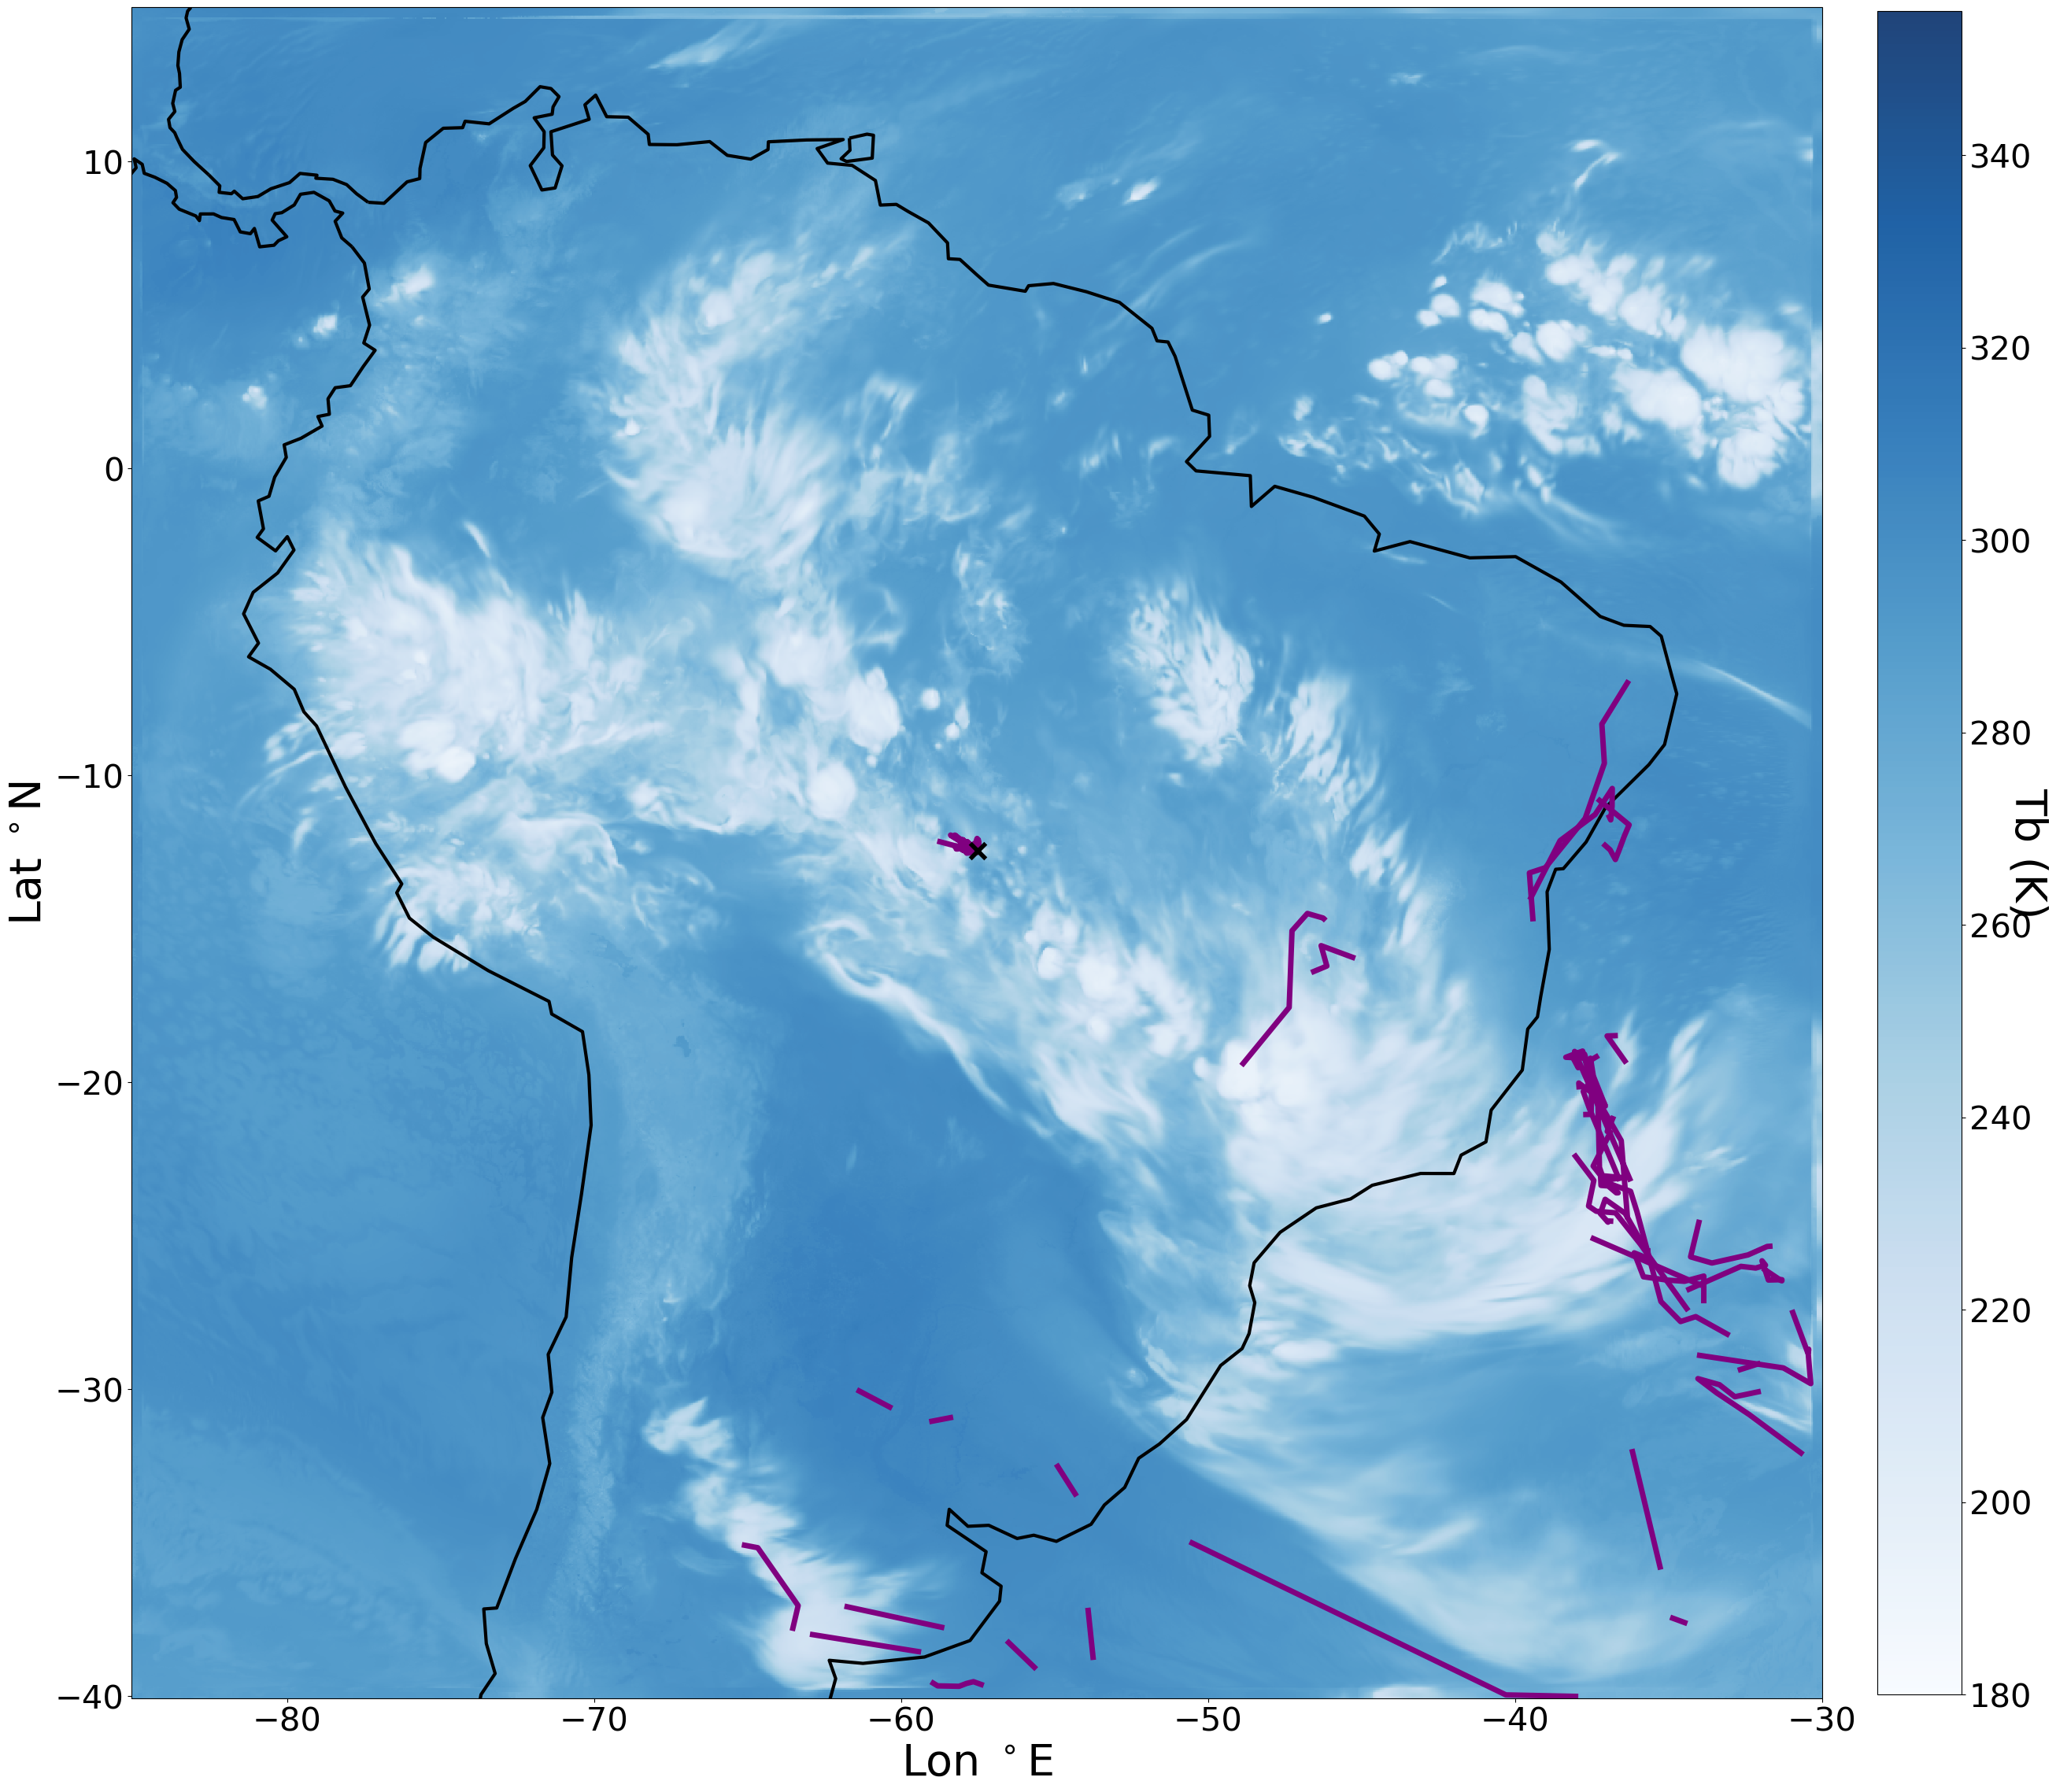

In [7]:
#plots for each timestep:
#========================

#creating list of dates and times for the plot titles:
time = tb.coord('time')
dates = time.units.num2date(time.points)

import cartopy.crs as ccrs
axis_extent=[-80,-30,-35,12]

#loop for each timestep:
plt.figure()

fig_map,ax_map=plt.subplots(figsize=(30,28),subplot_kw={'projection': ccrs.PlateCarree()})
for cell in tracks['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i = tracks[tracks['cell'] == cell]
    plt.plot(Track_i['longitude'],Track_i['latitude'], '-',linewidth=5,zorder=2,color='purple')


i = 102

#mask = iplt.contour(mask[i,:,:],colors='k',linewidth=2)
Tb = iplt.pcolormesh(tb[i,:,:],cmap='Blues',alpha=0.9,vmin=0,vmax=400)
plt.gca().coastlines(linewidth=3)
cbar = plt.colorbar(fraction=0.046, pad=0.03)
cbar.ax.tick_params(labelsize=30)
plt.clim(180,355)
cbar.set_label('Tb (K)',rotation=270,labelpad=15,fontsize=40)
time = features[features['frame']==i]
plt.scatter(x=time['longitude'],y=time['latitude'],c='k',marker='x',s=200,linewidth=4,zorder=5)	
plt.xticks([-80,-70,-60,-50,-40,-30],fontsize=30)
plt.yticks([-40,-30,-20,-10,0,10],fontsize=30)
plt.xlabel('Lon $^\circ$E', fontsize=40)
plt.ylabel('Lat $^\circ$N', fontsize=40)